<img src="https://training.dwit.edu.np/frontend/images/computer-training-institute.png">

# Data Science and Machine learning in Python

### Instructor: [Atish Adhikari](https://www.kaggle.com/atishadhikari)
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
X = iris.data
y = iris.target

In [14]:
sp_0 = X[ y==0 ]
sp_1 = X[ y==1 ]
sp_2 = X[ y==2 ]

In [15]:
mean_0 = np.mean(sp_0, axis=0)

In [16]:
mean_1 =  np.mean(sp_1, axis=0)
mean_2 = np.mean(sp_2, axis=0)

In [19]:
meu = np.array([mean_0, mean_1, mean_2])

In [20]:
meu

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [23]:
inter_class_scatter = np.cov(meu.T)

In [24]:
inter_class_scatter

array([[ 0.63212133, -0.19952667,  1.652484  ,  0.71279333],
       [-0.19952667,  0.11344933, -0.572396  , -0.22932667],
       [ 1.652484  , -0.572396  ,  4.371028  ,  1.86774   ],
       [ 0.71279333, -0.22932667,  1.86774   ,  0.80413333]])

In [25]:
within_class_scatter = np.cov(sp_0.T) + np.cov(sp_1.T) + np.cov(sp_2.T)

In [26]:
within_class_scatter

array([[0.79502449, 0.27816327, 0.50254286, 0.11520408],
       [0.27816327, 0.34616327, 0.16573061, 0.09813061],
       [0.50254286, 0.16573061, 0.55556327, 0.12799592],
       [0.11520408, 0.09813061, 0.12799592, 0.1256449 ]])

In [27]:
J = inter_class_scatter.dot( np.linalg.inv(within_class_scatter))

In [29]:
eig_val, eig_vec = np.linalg.eig(J)

In [30]:
eig_vec = eig_vec.T

In [34]:
eig_val.argsort()

array([2, 3, 1, 0], dtype=int64)

In [35]:
axis = eig_vec[[0,1]]

In [37]:
axis.shape

(2, 4)

In [38]:
X.shape

(150, 4)

In [39]:
X_reduced = X.dot(axis.T)

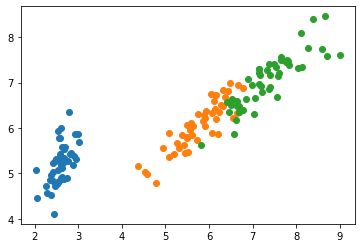

In [43]:
plt.scatter(X_reduced[y==0, 0], X_reduced[y==0, 1])
plt.scatter(X_reduced[y==1, 0], X_reduced[y==1, 1])
plt.scatter(X_reduced[y==2, 0], X_reduced[y==2, 1])
plt.show()

In [44]:
from sklearn.datasets import load_wine

In [45]:
wine = load_wine()

In [46]:
X = wine.data
y = wine.target

In [48]:
X.shape

(178, 13)

In [50]:
#print(wine.DESCR)

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [52]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [53]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [54]:
X_reduced.shape

(178, 2)

In [56]:
sum(pca.explained_variance_ratio_)

0.554063383569353

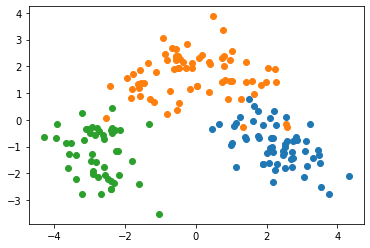

In [57]:
plt.scatter(X_reduced[y==0, 0], X_reduced[y==0, 1])
plt.scatter(X_reduced[y==1, 0], X_reduced[y==1, 1])
plt.scatter(X_reduced[y==2, 0], X_reduced[y==2, 1])
plt.show()

In [58]:
lda = LDA(n_components=2)

In [60]:
X_reduced = lda.fit_transform(X, y)

In [61]:
X_reduced.shape

(178, 2)

In [63]:
sum(lda.explained_variance_ratio_)

1.0

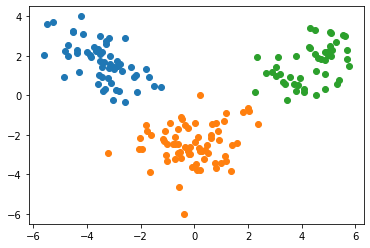

In [64]:
plt.scatter(X_reduced[y==0, 0], X_reduced[y==0, 1])
plt.scatter(X_reduced[y==1, 0], X_reduced[y==1, 1])
plt.scatter(X_reduced[y==2, 0], X_reduced[y==2, 1])
plt.show()

### KNN Classification

In [65]:
X = iris.data
y = iris.target

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier(n_neighbors=5)

In [69]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [90]:
test_cases = np.array([4.8, 3.0, 7, 1.2])

In [91]:
knn.predict(test_cases.reshape(1, -1))

array([2])

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [94]:
X_train.shape

(112, 4)

In [95]:
y_train.shape

(112,)

In [96]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [97]:
y_predcted = knn.predict(X_test)

In [99]:
y_predcted

array([1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1,
       0, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0])

In [100]:
y_test

array([1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1,
       0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0])